In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam
from keras.models import Sequential

In [8]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
(x_train,x_test)=(x_train/255.0,x_test/255.0)

11490434/11490434 [==============================] - 2s 0us/step


In [9]:
model=tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dropout(0,2),
tf.keras.layers.Dense(10,activation='softmax')
])

In [12]:
model.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
        

In [20]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir="logS/fit",histogram_freq=1)

In [21]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 29s 14ms/step - loss: 0.6133 - accuracy: 0.8512 - val_loss: 0.3425 - val_accuracy: 0.9091
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3232 - accuracy: 0.9107 - val_loss: 0.2827 - val_accuracy: 0.9223
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2753 - accuracy: 0.9230 - val_loss: 0.2506 - val_accuracy: 0.9303
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2450 - accuracy: 0.9320 - val_loss: 0.2268 - val_accuracy: 0.9372
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2222 - accuracy: 0.9385 - val_loss: 0.2077 - val_accuracy: 0.9424
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2034 - accuracy: 0.9434 - val_loss: 0.1912 - val_accuracy: 0.9457
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1874 - accuracy: 0.9480 - val_loss: 0.1791 -

In [22]:
%load_ext tensorboard

In [24]:
tensorboard --logdir log/fit

Reusing TensorBoard on port 6006 (pid 6028), started 0:00:08 ago. (Use '!kill 6028' to kill it.)

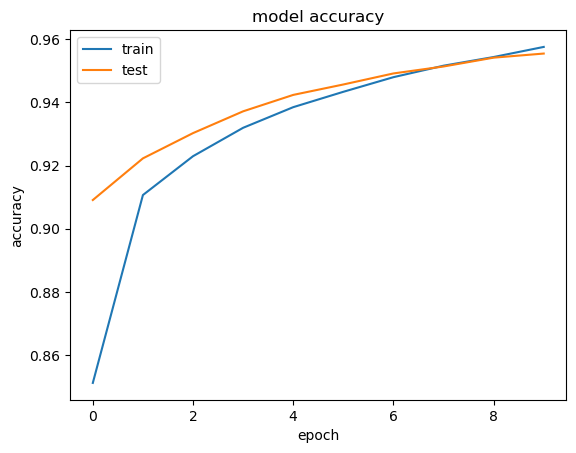

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

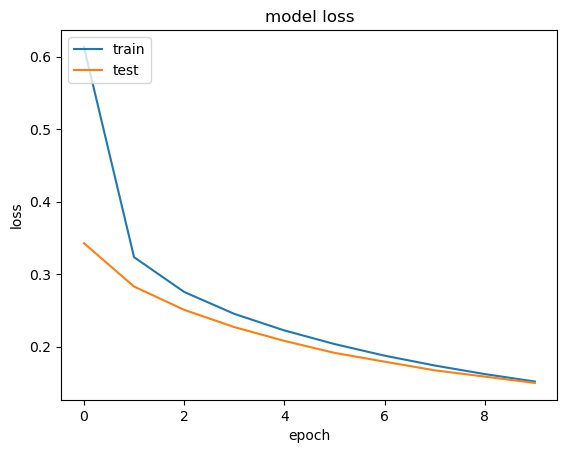

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()